# Model creation (4x8)

In [1]:
%load_ext autoreload
%autoreload 2

# Setup

In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from tools import common_functions as cf
from tools import regression as reg
from tools import plotting_functions as pf

# Folder prefix with all the taxel data
TAXEL_DATA_FOLDER = f"table_calibration/taxel"


# Parameters
SENSOR_LAG = 25 # ms
ARRAY_SIZE = 32

# Automated
data_columns = [f'X{i}' for i in range(ARRAY_SIZE)] + [f'Y{i}' for i in range(ARRAY_SIZE)] + [f'Z{i}' for i in range(ARRAY_SIZE)]

In [2]:
taxels_data = []

for i in range(ARRAY_SIZE):
  
  # Load the data
  taxel_data = cf.prepare_data_for_fitting(f"{TAXEL_DATA_FOLDER}{i}", ARRAY_SIZE, SENSOR_LAG, False)
  taxels_data.append(taxel_data)

/home/lowiek/masters-thesis/notebooks/tools/common_functions.py:292: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  data[col] -= np.mean(data[col][:window])
/home/lowiek/masters-thesis/notebooks/tools/common_functions.py:292: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  data[col] -= np.mean(data[col][:window])
/home/lowiek/masters-thesis/notebooks/tools/common_functions.py:292: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future ver

In [58]:
models = []
MSEs = []

for angle in np.linspace(-180, 180, 50):
  for i in [27]:
    
    taxel_data = taxels_data[i]
    
    # Fit the 0.5Hz data to a third order polynomial model
    columns = [f'X{i}', f'Y{i}',f'Z{i}']

    X = taxel_data[columns][:int(len(taxel_data) / 2)]
    Y = taxel_data[['F_x', 'F_y', 'F_z']][:int(len(taxel_data) / 2)]
    
    # Rotate the labels
    F_x = Y['F_x'] * np.cos(np.deg2rad(angle)) - Y['F_y'] * np.sin(np.deg2rad(angle))
    F_y = Y['F_x'] * np.sin(np.deg2rad(angle)) + Y['F_y'] * np.cos(np.deg2rad(angle))
    
    Y['F_x'] = F_x
    Y['F_y'] = F_y
    
    print(f"\nFitting taxel {i}:")
    model = reg.create_regression_pipeline_and_fit(X, Y, True)
    model.taxel_index = i
    models.append(model)
    
    # MSE 
    Y_pred = model.predict(X)
    mse = reg.mean_squared_error(taxel_data[['F_x', 'F_y', 'F_z']][:int(len(taxel_data) / 2)], Y_pred)
    MSEs.append(mse)
    
print(min(MSEs), np.argmin(MSEs))


Fitting taxel 27:
Score:  0.9296969968887666
MSE:  0.15703739381918672

Fitting taxel 27:
Score:  0.9295113219573228
MSE:  0.16069159621612597

Fitting taxel 27:
Score:  0.9297134470292537
MSE:  0.15563009663231553

Fitting taxel 27:
Score:  0.9287637194932744
MSE:  0.15654667815784443

Fitting taxel 27:
Score:  0.9271143953286348
MSE:  0.15749906993177765

Fitting taxel 27:
Score:  0.9290108180293047
MSE:  0.15667612844786005

Fitting taxel 27:
Score:  0.9301610305429877
MSE:  0.15738808051711045

Fitting taxel 27:
Score:  0.9289462565255694
MSE:  0.15740600962891482

Fitting taxel 27:
Score:  0.9293917136025577
MSE:  0.15762317765205217

Fitting taxel 27:
Score:  0.9289047728985095
MSE:  0.15707492516085195

Fitting taxel 27:
Score:  0.9309241936040574
MSE:  0.15279599711057076

Fitting taxel 27:
Score:  0.9279025142594932
MSE:  0.15643990017112544

Fitting taxel 27:
Score:  0.9292309992441284
MSE:  0.15781452672085447

Fitting taxel 27:
Score:  0.9291263884960612
MSE:  0.1548091425

In [60]:
np.linspace(-180, 180, 50)[24]

-3.673469387755091

In [ ]:
# Calculate RMS error
rms_error = []

for i in range(ARRAY_SIZE):
  

/tmp/ipykernel_223194/2085358767.py:27: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  ax[0].plot(taxels_data[TAXEL_ID]['F_x'][:int(len(taxel_data) / 2)], label='F/T readings X-axis')
/tmp/ipykernel_223194/2085358767.py:30: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  ax[1].plot(taxels_data[TAXEL_ID]['F_y'][:int(len(taxel_data) / 2)], label='F/T readings Y-axis')
/tmp/ipykernel_223194/2085358767.py:33: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is de

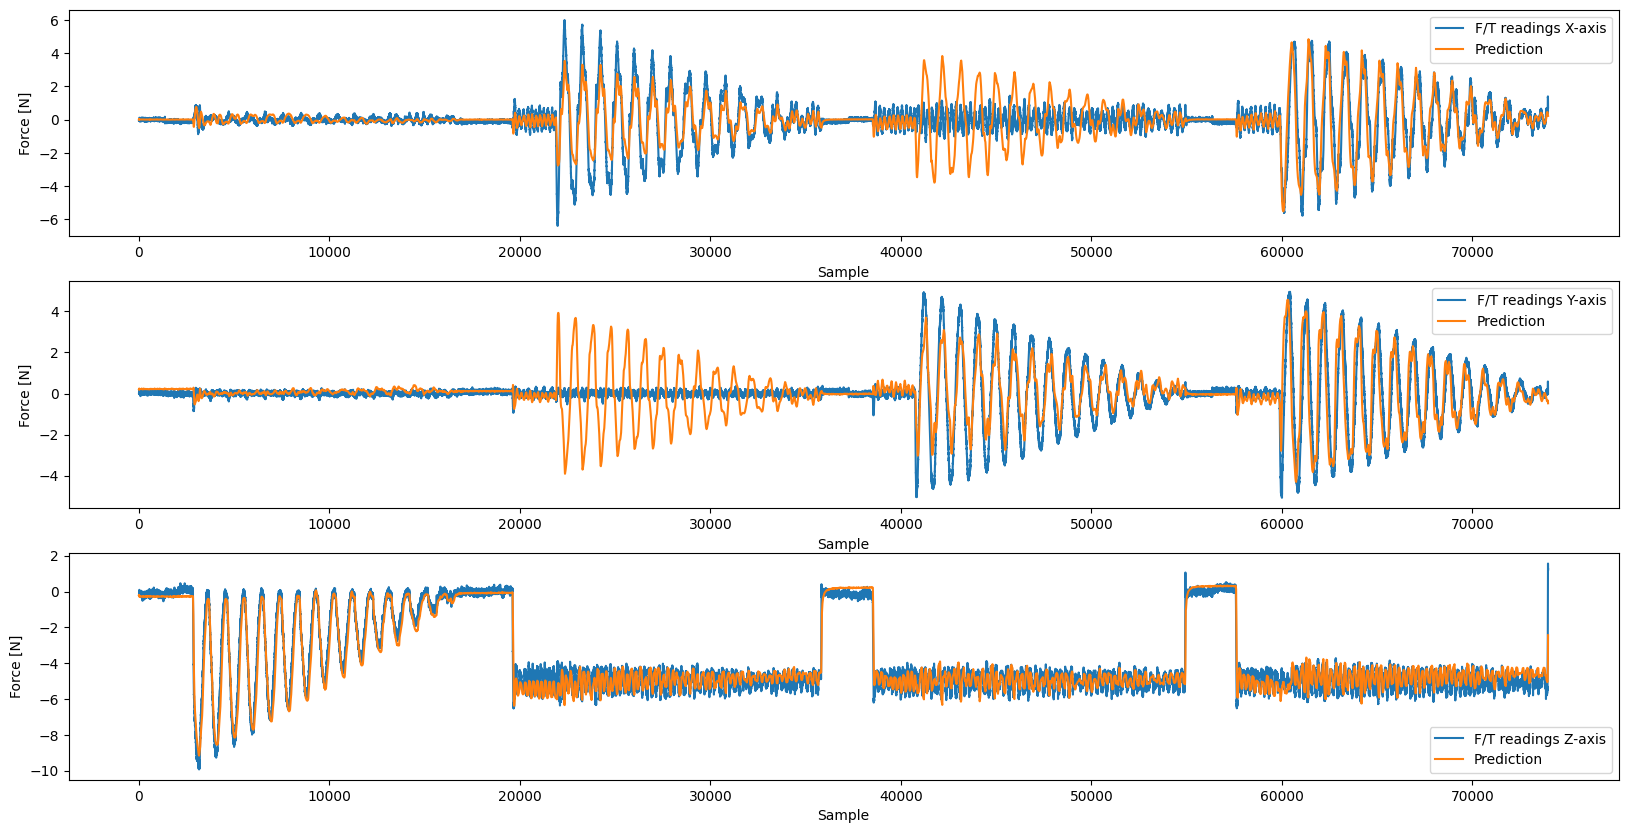

In [50]:
# Visualize a model
TAXEL_ID = 15

model = models[TAXEL_ID]

# Plot prediction (of complete run)
columns = [f'X{TAXEL_ID}', f'Y{TAXEL_ID}',f'Z{TAXEL_ID}']
Y_pred = model.predict(taxels_data[TAXEL_ID][columns][:int(len(taxel_data) / 2)])

angle = -45
F_x = Y_pred[:, 0] * np.cos(np.deg2rad(angle)) - Y_pred[:, 1] * np.sin(np.deg2rad(angle))
F_y = Y_pred[:, 0] * np.sin(np.deg2rad(angle)) + Y_pred[:, 1] * np.cos(np.deg2rad(angle))
  
pred_X = F_x
pred_Y = F_y
pred_Z = Y_pred[:, 2]

fig, ax = plt.subplots(3, 1, figsize=(20, 10))

ax[0].set_xlabel('Sample')
ax[0].set_ylabel('Force [N]')
ax[1].set_xlabel('Sample')
ax[1].set_ylabel('Force [N]')
ax[2].set_xlabel('Sample')
ax[2].set_ylabel('Force [N]')

ax[0].plot(taxels_data[TAXEL_ID]['F_x'][:int(len(taxel_data) / 2)], label='F/T readings X-axis')
ax[0].plot(pred_X, label='Prediction')

ax[1].plot(taxels_data[TAXEL_ID]['F_y'][:int(len(taxel_data) / 2)], label='F/T readings Y-axis')
ax[1].plot(pred_Y, label='Prediction')

ax[2].plot(taxels_data[TAXEL_ID]['F_z'][:int(len(taxel_data) / 2)], label='F/T readings Z-axis')
ax[2].plot(pred_Z, label='Prediction')

ax[0].legend()
ax[1].legend()
ax[2].legend()

In [9]:
for model in models:
  reg.save_taxel_models(model, f"4x8", f"taxel{model.taxel_index}")